# Supervised Machine Learning Models

### The models utilize 19 clinical attributes to predict breast cancer survival
#### The Models used were Logistic Regression, Support Vector Classification, Random Forest Classifier, AdaBoost classifier, and XGBoost Classifier

#### The Random Forest Classifier produced the strongest accuracy at 0.696


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Data/df_clinical_survival_ML.csv')
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()



,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,overall_survival,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_cellularity,encoded_pam50_+_claudin-low_subtype,encoded_er_status,encoded_her2_status,encoded_tumor_other_histologic_subtype,encoded_inferred_menopausal_state,encoded_integrative_cluster,encoded_pr_status
1,43.19,0,3.0,1,0,2.0,1,1,10.0,1.0,0,1,0,2,1,0,0,1,4,1
2,48.87,1,2.0,1,1,2.0,0,0,15.0,2.0,1,1,0,3,1,0,0,1,3,1
3,47.68,1,2.0,1,3,1.0,1,1,25.0,2.0,1,4,2,3,1,0,4,1,10,1
4,76.97,1,3.0,1,8,2.0,0,1,40.0,2.0,1,4,0,3,1,0,4,0,10,1
5,78.77,0,3.0,1,0,4.0,0,1,31.0,4.0,1,1,2,3,1,0,0,0,8,1


In [3]:
from sklearn.model_selection import StratifiedKFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [4]:
# Set features. Utilized as x values.
selected_features = df.drop(['overall_survival'], axis=1)

In [5]:
# Set X and y variables
y = df['overall_survival']
X = selected_features

print(X.shape, y.shape)

(1017, 19) (1017,)


In [6]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
# from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.head()

,age_at_diagnosis,chemotherapy,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,radio_therapy,tumor_size,tumor_stage,encoded_type_of_breast_surgery,encoded_cancer_type_detailed,encoded_cellularity,encoded_pam50_+_claudin-low_subtype,encoded_er_status,encoded_her2_status,encoded_tumor_other_histologic_subtype,encoded_inferred_menopausal_state,encoded_integrative_cluster,encoded_pr_status
196,51.74,0,2.0,1,0,4.0,0,22.0,2.0,1,4,2,2,1,0,4,0,9,1
997,68.93,0,2.0,1,1,8.0,0,18.0,2.0,1,1,0,1,1,1,0,0,6,1
1028,81.57,0,2.0,1,3,11.0,0,35.0,2.0,1,1,0,2,1,0,0,0,9,1
407,52.98,0,1.0,0,0,10.0,1,10.0,1.0,0,1,0,2,1,0,7,0,9,1
1052,51.25,1,3.0,1,1,7.0,1,25.0,2.0,1,1,2,1,0,0,0,0,5,0


In [8]:
# Scale data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


In [9]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(predictions)

[1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1
 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0
 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0]


In [10]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.6916010498687664
Testing Data Score: 0.6313725490196078


In [11]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, 
                            target_names = ["1", "0"]))

              precision    recall  f1-score   support

           1       0.60      0.47      0.53       111
           0       0.65      0.76      0.70       144

    accuracy                           0.63       255
   macro avg       0.62      0.61      0.61       255
weighted avg       0.63      0.63      0.62       255



In [12]:
#GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
              'penalty': ['l1', 'l2'],
              'max_iter': [200,500,800],
              'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(model, param_grid, verbose=3)

In [13]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=1

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 1/5] END C=10, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=10, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=10, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=10, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 5/5] END C=10, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 1/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=50, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=50, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 2/5] END C=50, max_iter=800, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=50, max_iter=800, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=50, max_iter=800, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=50, max_iter=800, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ...C=50, max_iter=800, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...C=50, max_iter=800, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...C=50, max_iter=800, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...C=50, max_iter=800, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...C=50, max_iter=800, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=50, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C=50, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 3/5] END C=50, max_iter=800, penalty=l2, solver=liblinear; total time=   0.0s
[CV 4/5] END C=50, ma

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV 2/5] END C

C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\nick\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\nick\anaconda3\lib\site-packages\sklearn\model_selection\_va

GridSearchCV(estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 800],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

In [14]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
0.6666666666666667


In [15]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report, confusion_matrix

def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
lr_params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
logistic_regression = GridSearchCV(LogisticRegression(random_state=42), param_grid=lr_params, n_jobs=-1, cv=4)
lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train.values, y_test.values)

CV scores:  [0.64705882 0.64705882 0.68421053 0.67763158 0.72368421]
CV Standard Deviation:  0.02835142594041631

CV Mean score:  0.6759287925696595
Train score:    0.6902887139107612
Test score:     0.6352941176470588

Confusion Matrix: 
[[ 53  58]
 [ 35 109]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.60      0.48      0.53       111
           1       0.65      0.76      0.70       144

    accuracy                           0.64       255
   macro avg       0.63      0.62      0.62       255
weighted avg       0.63      0.64      0.63       255



In [17]:
#SVC Model import and use
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.63398693 0.67320261 0.63157895 0.69078947 0.71710526]
CV Standard Deviation:  0.032961360996011185

CV Mean score:  0.6693326453388373
Train score:    0.7887139107611548
Test score:     0.6705882352941176

Confusion Matrix: 
[[ 59  52]
 [ 32 112]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.53      0.58       111
           1       0.68      0.78      0.73       144

    accuracy                           0.67       255
   macro avg       0.67      0.65      0.66       255
weighted avg       0.67      0.67      0.66       255



In [18]:
#AdaBoost model import and use
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(random_state=42)
ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.64052288 0.65359477 0.63157895 0.65789474 0.71052632]
CV Standard Deviation:  0.02749022320596332

CV Mean score:  0.6588235294117647
Train score:    0.7427821522309711
Test score:     0.6313725490196078

Confusion Matrix: 
[[ 57  54]
 [ 40 104]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.59      0.51      0.55       111
           1       0.66      0.72      0.69       144

    accuracy                           0.63       255
   macro avg       0.62      0.62      0.62       255
weighted avg       0.63      0.63      0.63       255



In [19]:
#RandomForest Model import and use
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)
rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.64705882 0.68627451 0.63157895 0.71052632 0.70394737]
CV Standard Deviation:  0.03127118047003931

CV Mean score:  0.6758771929824562
Train score:    1.0
Test score:     0.6862745098039216

Confusion Matrix: 
[[ 71  40]
 [ 40 104]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       111
           1       0.72      0.72      0.72       144

    accuracy                           0.69       255
   macro avg       0.68      0.68      0.68       255
weighted avg       0.69      0.69      0.69       255



In [20]:
start_time = time.time()
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


In [21]:
importances = random_forest.feature_importances_
sorted(zip(random_forest.feature_importances_,selected_features.columns),reverse = True)

[(0.17206561663219763, 'age_at_diagnosis'),
 (0.15152178950250134, 'tumor_size'),
 (0.1112580488257793, 'mutation_count'),
 (0.09152318681037777, 'lymph_nodes_examined_positive'),
 (0.08329902779546493, 'encoded_integrative_cluster'),
 (0.06323623927449042, 'encoded_pam50_+_claudin-low_subtype'),
 (0.04089080218675047, 'encoded_cellularity'),
 (0.03976699207780875, 'tumor_stage'),
 (0.035166966682676555, 'neoplasm_histologic_grade'),
 (0.029074080546469157, 'encoded_type_of_breast_surgery'),
 (0.028091503941463952, 'encoded_tumor_other_histologic_subtype'),
 (0.024777109401614827, 'encoded_pr_status'),
 (0.022915072123597415, 'hormone_therapy'),
 (0.022731903673563782, 'radio_therapy'),
 (0.019134726777313576, 'encoded_cancer_type_detailed'),
 (0.019024230682131202, 'chemotherapy'),
 (0.01704969876389588, 'encoded_inferred_menopausal_state'),
 (0.014448753053424213, 'encoded_er_status'),
 (0.014024251248478769, 'encoded_her2_status')]

In [22]:
feature_names = [c for c in X.columns]

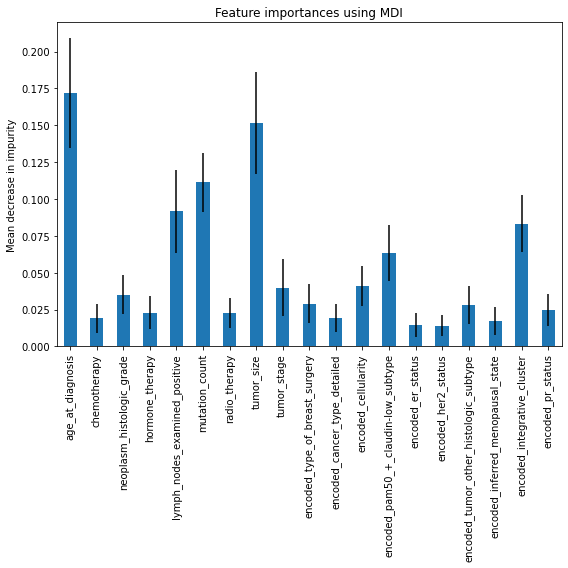

In [23]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [24]:
#Saving RandomForest Model for use as it produced strongest accuracy
import joblib
filename = 'randomForest_model.pkl'
joblib.dump(random_forest, filename)

['randomForest_model.pkl']

In [ ]:
#Save scaler
joblib.dump(X_scaler, 'scaler.pkl')

In [25]:
# #Testing loading the model back in
# rfm = joblib.load('randomForest_model.pkl')

In [26]:
# #Simply test of loaded saved model
# rfm.predict(X_test)

In [27]:
#Import XGB and use
from xgboost.sklearn import XGBClassifier

In [28]:
! pip install xgboost

In [29]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

clinical_xgb1_pred_, clinical_xgb1_test_score, clinical_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test)

[11:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel